# Pengenalan SymPy

Fadjar Fathurrahman

In [1]:
import sympy
from sympy import *

In [2]:
print(sympy.__version__)

1.1.1


In [3]:
init_printing(use_latex=True)

## Operasi dasar

Fungsi `symbols` dapat digunakan untuk membuat objek simbolik. Sebagai contoh, kita akan membuat suatu tiga objek simbolik `x`, `y`, dan `z`:

In [4]:
x, y, z = symbols("x y z")

Jika kita menggunakan `init_print(use_latex=True)`, maka tampilan dari objek tersebut merupakan $x$, $y$, dan $z$:

In [12]:
x, y, z

Tipe dari `x`, `y`, dan `z` adalah `Symbol` (lebih lengkapnya adalah `sympy.symbol.Symbol`).

In [16]:
type(x), type(y), type(z)

(sympy.core.symbol.Symbol, sympy.core.symbol.Symbol, sympy.core.symbol.Symbol)

Mari kita mulai dengan perhitungan sederhana. Misalkan kita ingin menghitung hasil dari
$$
2x + \frac{3x}{5x^2} - 7x
$$

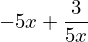

In [5]:
expr = 2*x + 3*x/(5*x**2) - 7*x
expr

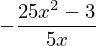

In [13]:
factor(expr)

### Substitusi

Salah satu operasi yang sering dilakukan adalah substitusi. Misalkan kita ingin melakukan substitusi $x \rightarrow 3y$, maka kita dapat menggunakan metode `subs` dari suatu objek simbolik (`Symbol`).

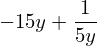

In [15]:
expr.subs(x, 3*y)

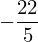

In [17]:
expr.subs(x, 1)

In [25]:
expr.subs(x, 2/3)

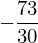

In [26]:
expr.subs(x, Integer(2)/Integer(3))

In [30]:
type(Integer(2)/Integer(3)), type(2/3)

(sympy.core.numbers.Rational, float)

In [32]:
Rational(2,3)

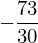

In [33]:
expr.subs(x, Rational(2,3))

Untuk melakukan beberapa substitusi sekaligus, kita dapat memberikan list `(old, new)` ke metode `subs`. Sebagai contoh:

In [40]:
expr = x**3 + 6*x*y - z
expr, expr.subs( [(x, 2*x), (y, 4), (z, 0)] )

### Mengubah string menjadi ekspresi SymPy

Metode `sympify` dapat digunakan untuk mengubah suatu string menjadi ekspresi SymPy.

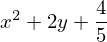

In [42]:
str_expr = "x**2 + 2*y + 4/5"
expr = sympify(str_expr)
expr

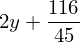

In [43]:
expr.subs(x, Rational(4,3))

### Mengevaluasi ekspresi menjadi nilai numerik float

Metode `evalf` dapat digunakan untuk mengevaluasi suatu ekspresi menjadi nilai numerik float.

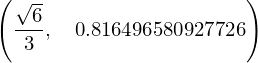

In [45]:
expr = sqrt(Rational(2,3))
expr, expr.evalf()

Karena kita menggunakan `from sympy import *` maka beberapa konstanta dan fungsi dari modul standard Python `math` akan digantikan dengan konstanta dan fungsi dari SymPy yang lebih cocok untuk perhitungan simbolik. Salah satu konstanta tersebut adalah `pi`. Perhatikan bahwa `pi` di sini adalah `pi` dari modul `sympy` bukan dari `math`.

In [52]:
import math
pi, math.pi

Evaluasi nilai numerik dari $\pi$ dalam 40 digit:

In [49]:
pi.evalf(40)

Evaluasi nilai $\pi$ dalam 1000 digit. Kita menggunakan fungsi `print` agar lebih mudah ditampilkan (tidak menggunakan LaTeX).

In [51]:
print(pi.evalf(1000))

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

Contoh lain:

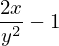

In [56]:
expr = 2*x/y**2 - 1
expr

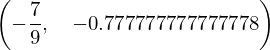

In [59]:
expr1 = expr.subs([ (x,1), (y,3)])
expr1, expr1.evalf()

In [60]:
expr.evalf(subs={x: 1, y: 3})

## Kalkulus

Turunan dapat dihitung dengan menggunakan perintah `diff`:

In [9]:
eksp = cos(x**3)*cos(y**4)*cos(z**2)
eksp

Turunan pertama terhadap `x`. Secara default `diff` akan menghitung turunan pertama.

In [10]:
diff(eksp, x)

Turunan kedua terhadap `y`

In [11]:
diff(eksp, y, 2)

Turunan keempat terhadap `z`

In [13]:
diff(eksp, z, 4)

Integral dapat dihitung dengan menggunakan fungsi `integrate`.

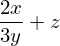

In [17]:
eksp = 2*x/(3*y) + z
eksp

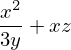

In [18]:
integrate(eksp, x)

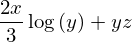

In [19]:
integrate(eksp, y)

Ingat: Secara default fungsi `log` dihitung terhadap bilangan Euler $e$ (logaritma natural)

In [22]:
exp(1), log(exp(1))

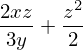

In [23]:
integrate(eksp, z)

Contoh integral definit (dengan batas atas dan bawah).

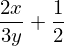

In [24]:
integrate(eksp, (z,0,1))

Fungsi `Integral` dapat digunakan untuk membuat sebuah objek integral yang belum dievaluasi (berguna untuk menampilkan integral).

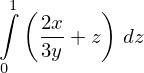

In [27]:
myinteg = Integral(eksp, (z,0,1))
myinteg

Untuk mengevaluasi integral tersebut, kita dapat menggunakan metode `doit()`.

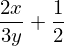

In [28]:
myinteg.doit()

Contoh lain, fungsi Gaussian:

In [32]:
eksp = exp(-x**2)
eksp

Tanda `oo` dapat digunakan untuk merepresentasikan tak hingga ($\infty$)

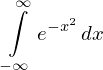

In [33]:
myinteg = Integral(eksp, (x,-oo,oo))
myinteg

In [34]:
myinteg.doit()

Fungsi Gaussian dikalikan dengan $x^2$

In [37]:
eksp = x**2*exp(-x**2)
eksp

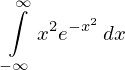

In [38]:
myinteg = Integral(eksp, (x,-oo,oo))
myinteg

In [39]:
myinteg.doit()

Perhitungan integral secara simbolik sangat sulit. Tidak semua integral dapat diselesaikan secara analitik oleh SymPy.

## Matriks

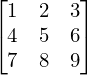

In [62]:
mat = Matrix([[1,2,3], [4,5,6], [7,8,9]] )
mat

In [63]:
mat.row(0)

In [67]:
mat.col(1)

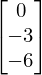

In [71]:
3*ones(3,1) - mat.col(2)

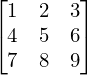

In [72]:
mat

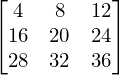

In [77]:
mat = mat*2
mat

In [78]:
mat1 = mat

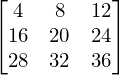

In [79]:
mat1

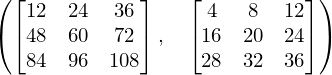

In [80]:
mat1 = mat1*3
mat1, mat

In [82]:
mat1[0] = 2

In [88]:
mat1[0:2,2:3] = Matrix([[0],[0]])

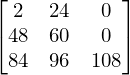

In [89]:
mat1

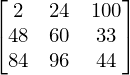

In [91]:
mat1[:,2] = Matrix([ [100], [33], [44]])
mat1

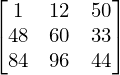

In [94]:
mat1[0,:] = mat1[0,:]/2
mat1

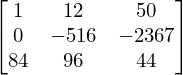

In [95]:
mat1[1,:] = mat1[1,:] - 48*mat1[0,:]
mat1

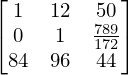

In [96]:
mat1[1,:] = mat1[1,:]/(-516)
mat1

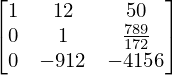

In [97]:
mat1[2,:] = mat1[2,:] - 84*mat1[0,:]
mat1

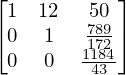

In [98]:
mat1[2,:] = mat1[2,:] - mat1[1,:]*-912
mat1